In [7]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from tqdm import tqdm

from sklearn.utils import resample
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from wordcloud import WordCloud, STOPWORDS 

- ## Import data

In [2]:
with open('../datafiles/doners/donerschoose_pickle.pickle','rb') as pik:
    ds_trainx_csr = pickle.load(pik)
    d_testx_csr = pickle.load(pik)
    d_cvx_csr = pickle.load(pik)
    d_trainx_csr = pickle.load(pik)
    d_testx2_csr = pickle.load(pik)
    pik.close()
with open('../datafiles/doners/donerschoose_pickle_y.pickle','rb') as pik:
    ds_trainy = pickle.load(pik)
    d_testy = pickle.load(pik)
    d_cvy = pickle.load(pik)
    d_trainy = pickle.load(pik)
    d_testy = pickle.load(pik)
    pik.close()
ds_trainx_csr.toarray().shape,ds_trainy.shape,d_testx_csr.toarray().shape,d_testy.shape,d_cvx_csr.toarray().shape,d_cvy.shape,d_trainx_csr.toarray().shape,d_trainy.shape,d_testx2_csr.toarray().shape,d_testy.shape

((61452, 16662),
 (61452,),
 (27312, 16662),
 (27312,),
 (20484, 16662),
 (20484,),
 (81936, 18831),
 (81936,),
 (27312, 18831),
 (27312,))

In [8]:
max_depth,min_samples_split=[1, 5, 10, 50],[5, 10, 100, 500]
gs_clf = GridSearchCV(DecisionTreeClassifier(),{'max_depth':max_depth,'min_samples_split':min_samples_split},scoring='roc_auc',cv=5,verbose=2,n_jobs=-1,return_train_score=True)
gs_clf.fit(d_trainx_csr,d_trainy)
print(gs_clf.best_estimator_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   46.8s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 22.6min finished
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [10]:
with open('../datafiles/doners/donerschoose_DT.pickle','wb') as pik:
    pickle.dump(gs_clf,pik)


In [3]:
with open('../datafiles/doners/donerschoose_DT.pickle','rb') as pik:
    clf = pickle.load(pik)

In [5]:
clf.cv_results_

{'mean_fit_time': array([  4.25434918,   2.62531652,   7.33303185,   5.4523488 ,
         27.06001577,  24.32747126,  23.34732318,  22.66591797,
         61.20422034,  57.1956943 ,  48.93860106,  53.60446529,
        496.15038466, 471.08963351, 431.89147105, 241.72389703]),
 'std_fit_time': array([ 1.32373255,  0.14929386,  2.69809509,  1.40376936,  1.70587549,
         3.49821896,  2.8927227 ,  2.0338308 ,  3.54846456,  4.35011005,
         2.88271355,  3.9563321 , 14.961746  , 21.61973988, 14.31835983,
        40.4896466 ]),
 'mean_score_time': array([0.23605084, 0.09889603, 0.20291052, 0.17011509, 0.15739961,
        0.24402766, 0.14932055, 0.14487638, 0.10646105, 0.13320446,
        0.15889425, 0.1319438 , 0.11721992, 0.13512812, 0.13884473,
        0.09336009]),
 'std_score_time': array([0.14447424, 0.01865387, 0.06871986, 0.06719464, 0.07246109,
        0.12351284, 0.04403857, 0.03473887, 0.02485516, 0.04084037,
        0.07010853, 0.04095028, 0.01695179, 0.0417019 , 0.04686669,


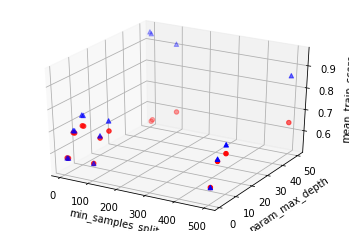

In [8]:
# 3d sactter in Matplotlib
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(clf.cv_results_['param_min_samples_split'].data,clf.cv_results_['param_max_depth'].data, clf.cv_results_['mean_test_score'], c='r', marker='o')
ax.scatter(clf.cv_results_['param_min_samples_split'].data,clf.cv_results_['param_max_depth'].data, clf.cv_results_['mean_train_score'], c='b', marker='^')
ax.set_xlabel('min_samples_split')
ax.set_ylabel('param_max_depth')
ax.set_zlabel('mean_train_score')
plt.show()

# 3d sactter in Plotly
trace1 = go.Scatter3d(x=clf.cv_results_['param_min_samples_split'].data,y=clf.cv_results_['param_max_depth'].data, z=clf.cv_results_['mean_test_score'], name = 'Cross validation',mode='markers')
trace2 = go.Scatter3d(x=clf.cv_results_['param_min_samples_split'].data,y=clf.cv_results_['param_max_depth'].data, z=clf.cv_results_['mean_train_score'], name = 'Train',mode='markers')
data = [trace1, trace2]

layout = go.Layout(scene = dict(
                    xaxis = dict(
                         title='min_samples_split',
                         backgroundcolor="rgb(200, 200, 230)",
                         gridcolor="white",
                         showbackground=True,
                         zerolinecolor="black"),
                    yaxis = dict(
                        title='max_depth',
                        backgroundcolor="rgb(230, 200,230)",
                        gridcolor="white",
                        showbackground=True,
                        zerolinecolor="black"),
                    zaxis = dict(
                        title='AUC',
                        backgroundcolor="rgb(230, 230,200)",
                        gridcolor="white",
                        showbackground=True,
                        zerolinecolor="black",),),
                    width=700,
                    margin=dict(r=10, l=10,b=10, t=10))

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='3d-scatter-colorscale')

# Heatmap

fig = go.Figure(data=[go.Heatmap(
                   z=clf.cv_results_['mean_test_score'].reshape(4,4),
                   x=['@5', '@10', '@100', '@500'],
                   y=['@1', '@5', '@10', '@50'],colorscale = 'Viridis'
                   )])
fig.update_xaxes(title_text="min_samples_split")
fig.update_yaxes(title_text="max_depth")
fig.show()

In [22]:
def Plot_roc(clf,X,Y,x,y,*cv):
    y_probability = clf.predict_proba(X)[:,1]
    fpr, tpr, threshold = roc_curve(Y, y_probability)
    roc_auc = roc_auc_score(Y, y_probability)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'g', label = 'AUC-Test = %0.2f' % roc_auc)

    y_probability = clf.predict_proba(x)[:,1]
    fpr, tpr, threshold = roc_curve(y, y_probability)
    roc_auc = roc_auc_score(y, y_probability)
    plt.plot(fpr, tpr, 'b', label = 'AUC-Train = %0.2f' % roc_auc)

    if(len(cv)==2):
        y_probability = clf.predict_proba(cv[0])[:,1]
        fpr, tpr, threshold = roc_curve(cv[1], y_probability)
        roc_auc = roc_auc_score(cv[1], y_probability)
        plt.plot(fpr, tpr, 'y', label = 'AUC-CV = %0.2f' % roc_auc)

    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
def Confusion_mat(clf,X,Y,x,y,*cv):
    plot_confusion_matrix(clf,X,Y)
    plt.title('Confusion Matrix on Test Data')
    plot_confusion_matrix(clf,x,y)
    plt.title('Confusion Matrix on Train Data')
    if(len(cv)==2):
        plot_confusion_matrix(clf,cv[0],cv[1])
        plt.title('Confusion Matrix on CV Data')
    plt.show()

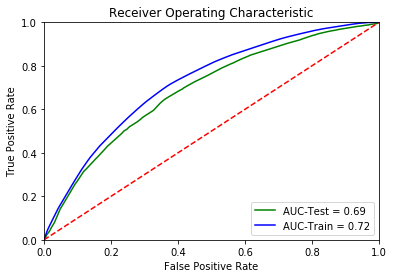

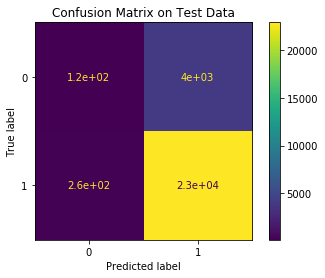

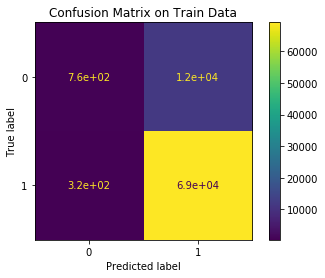

In [13]:
Plot_roc(clf,d_testx2_csr,d_testy,d_trainx_csr,d_trainy)
Confusion_mat(clf,d_testx2_csr,d_testy,d_trainx_csr,d_trainy)

- ### As we can see in the confusion matrix, we see that our model does an v.good job of classifying (y=1) data but is v.bad at classifying (y=2) data.
So we are going to train our model with the best parameters, but this time in balanced mode and then compare the results.

In [4]:
clf2 = DecisionTreeClassifier(max_depth=10,min_samples_split=500,class_weight='balanced')
clf2.fit(d_trainx_csr,d_trainy)

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=500)

In [4]:
Plot_roc(clf2,d_testx2_csr,d_testy,d_trainx_csr,d_trainy)
Confusion_mat(clf2,d_testx2_csr,d_testy,d_trainx_csr,d_trainy)

NameError: name 'Plot_roc' is not defined

> confusion_matrix of balanced data

In [8]:
confusion_matrix(d_testy,clf2.predict(d_testx2_csr)),confusion_matrix(d_trainy,clf2.predict(d_trainx_csr))

(array([[ 2775,  1361],
        [ 9056, 14120]], dtype=int64),
 array([[ 9220,  3186],
        [26649, 42881]], dtype=int64))

> confusion_matrix of Un-balanced data

In [9]:
confusion_matrix(d_testy,clf.best_estimator_.predict(d_testx2_csr)),confusion_matrix(d_trainy,clf.best_estimator_.predict(d_trainx_csr))

NameError: name 'clf' is not defined

# You have to repeate same above steps with the Tfidf,tfidf-W2v,avg-w2v data

In [5]:
df2 = pd.DataFrame({'true':d_testy,'pred':clf2.predict(d_testx2_csr)},index=d_testy.index)
indx =list(df2[(df2['true']==0) & (df2['pred']==1)].index)
len(indx)

1361

In [6]:
df3 = pd.read_csv('../datafiles/doners/final_data.csv')
df3.loc[indx,'essay']

70637     My students come from a diverse farming commun...
9877      My students are all in an intensive needs clas...
5048      I teach at Warren Elementary school in Helena ...
29686     In our student pledge we promise to be \"the b...
84990     As a teacher who teaches in a low income area,...
                                ...                        
107530    My students live in a low-income urban area wh...
65666     I have 21 third graders from all different bac...
9722      I instruct in a school that 100% of the studen...
69287     I teach in a high poverty school.  My students...
17307     I have a classroom full of very caring fifth-g...
Name: essay, Length: 1361, dtype: object

In [12]:
comment_words = '' 
stopwords = set(STOPWORDS)
for val in df3.loc[indx,'essay']: 
    val = str(val) 
    tokens = val.split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    comment_words += " ".join(tokens)+" "
len(comment_words.split())

357356

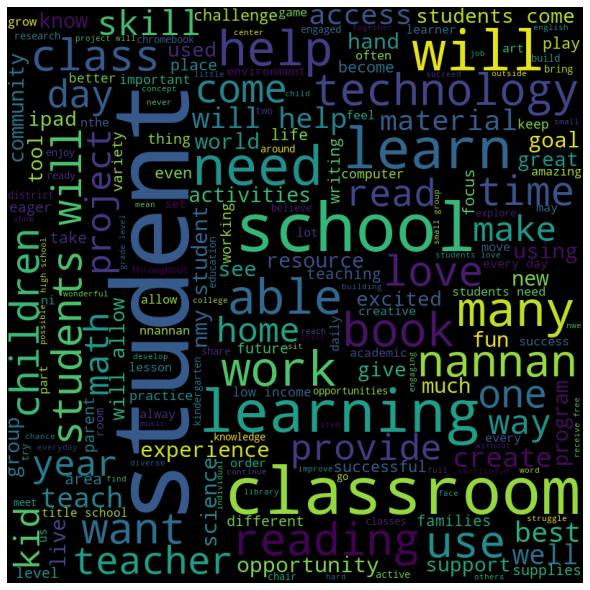

In [46]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [21]:
fig = go.Figure(data=[go.Box(y=df3.loc[indx,'nrm_price'],
            boxpoints=False, # can also be outliers, or suspectedoutliers, or False
            jitter=0.3, # add some jitter for a better separation between points
            pointpos=-1.8 # relative position of points wrt box
              )])

fig.show()

In [19]:
df3.columns

Index(['teacher_prefix', 'school_state', 'submission_y',
       'project_grade_category', 'project_subject_categories',
       'project_subject_subcategories', 'project_title', 'title_len',
       'teacher_number_of_previously_posted_projects', 'essay', 'essay_len',
       'nrm_price', 'std_price', 'quantity', 'project_is_approved'],
      dtype='object')

In [30]:
clf3 = DecisionTreeClassifier(min_samples_split=500,class_weight='balanced')
clf3.fit(d_trainx_csr,d_trainy)

DecisionTreeClassifier(class_weight='balanced', min_samples_split=500)

In [31]:
len(clf3.feature_importances_)

18831

In [36]:
np.argwhere(clf3.feature_importances_ != 0).ravel()

array([    5,    19,    31, ..., 18828, 18829, 18830], dtype=int64)

In [39]:
new_sparse_train = d_trainx_csr[:,np.argwhere(clf3.feature_importances_ != 0).ravel()]
new_sparse_test = d_testx2_csr[:,np.argwhere(clf3.feature_importances_ != 0).ravel()]

In [44]:
clf4 = DecisionTreeClassifier(max_depth = 10,min_samples_split=500,class_weight='balanced')
clf4.fit(new_sparse_train,d_trainy)

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=500)

In [45]:
confusion_matrix(d_testy,clf4.predict(new_sparse_test)),confusion_matrix(d_trainy,clf4.predict(new_sparse_train))

(array([[ 2775,  1361],
        [ 9055, 14121]], dtype=int64),
 array([[ 9220,  3186],
        [26651, 42879]], dtype=int64))